# Picterra with non-geospatial imagery

This is an example of using Picterra with non-geospatial imagery (for example PNG or JPEG images)

Since the platform is built around geospatial imagery, the polygons returned by the API are in GeoJSON by default.
If you upload a .png/.jpeg to the platform, it will be placed in an arbitrary location (at latitude=0, longitude=0).

This means that when you run a detector on the image, you will get back latitude/longitude coordinates around this point zero.

Our python client library exposes a function to convert the detector output back into image pixel coordinates. We will walk through its usage in this notebook.


**Important**: The Picterra API is most efficient with large images. If you want to detect on a large number of small images, we currently recommend that you do a mosaic of them and that you submit the mosaic to the API. Since we have a minimum charge of 10MP, you will get charged less this way and it will be faster.


In [1]:
import os
import picterra

## Detecting

The first step is to run the detector as usual with the picterra API client

In [2]:
# Avoid re-running it if we already have results
if not os.path.exists('nongeo_results.geojson'):
    # You will need to put your own raster / detector id here
    detector_id = '<detector_id>'
    raster_id = client.upload_raster('data/xy-test-image.jpeg', name='nongeo test image')
    pic = APIClient()

    result_id = pic.run_detector(detector_id, raster_id)
    pic.download_result_to_file(result_id, 'nongeo_results.geojson')

## Converting detections to pixel coordinates

Now, let's conver the results.geojson into xy polygons

In [3]:
polygons = picterra.nongeo_result_to_pixel('nongeo_results.geojson')

In [4]:
# Note that polygons can have holes, so a polygon is a list of rings, with the first ring being the outer boundary of
# the polygon and other rings being holes in this boundary

# Let's just print a point to check we are in pixel coordinates
print(polygons[0][0][0])

(75.49999999997344, 75.50000002046971)


## Visualizing the results

Let's load the image and display it. This is an image from the [kaggle ultrasound nerve segmentation](https://www.kaggle.com/c/ultrasound-nerve-segmentation) challenge

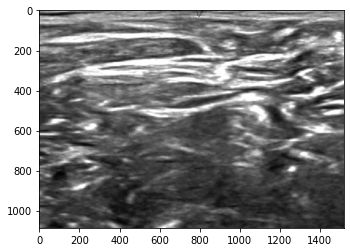

In [5]:
import pylab as pl
from skimage import io
%matplotlib inline

img = io.imread('data/xy-test-image.jpeg')
pl.imshow(img)

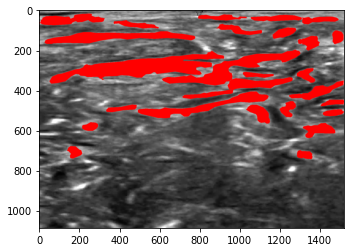

In [7]:
import skimage.draw as skdraw
import numpy as np

vimg = img.copy()
for polygon in polygons:
    outer_ring = polygon[0]
    # Only outer ring
    p = np.array(outer_ring)
    rr, cc = skdraw.polygon(p[:, 1], p[:, 0])
    vimg[rr, cc] = (255, 0, 0)

pl.imshow(vimg)

The example detector we used was trained to detect elongated white areas and the result here looks correct !

Here are the same results on the platform. As you can see, our drawing above is correct !

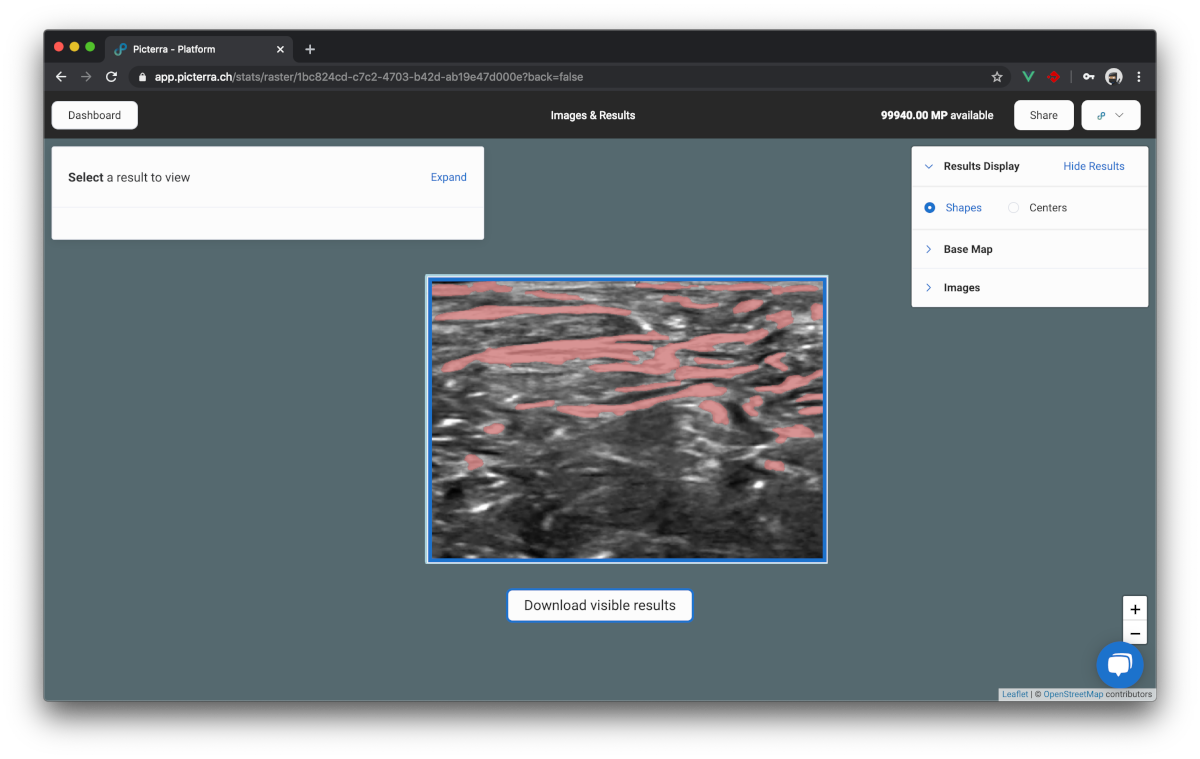